# Step 2. Data Description
Role：Load libraries. Import the dataset. 
Check data types, identify categorical and numerical columns and missing values to prepare for data cleaning

In [69]:
# Setup
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

# Paths
DATA_PATH   = Path("diabetes_diagnosis.csv")                
CLEAN_PATH = Path("outputs/diabetes_diagnosis_clean.csv")  
CLEAN_PATH.parent.mkdir(parents=True, exist_ok=True)       

In [72]:
# 2.1 Load & shape
df = pd.read_csv(DATA_PATH)

# 2.2 Quick peek at the dataset
n_rows, n_cols = df.shape
print(f"Instances (rows): {n_rows}")
print(f"Attributes (columns): {n_cols}")
df.head(3)

# Stats about the dataset
df.describe() 

Instances (rows): 264802
Attributes (columns): 23


,Unnamed: 0,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,Mental (days),Physical (days),DiffWalk,Age
count,264802.000000,113865.000000,177418.000000,145642.000000,105921.000000,193306.000000,76793.000000,103273.000000,95329.000000,82089.000000,66201.000000,135050.000000,121809.000000,121809.000000,201250.000000
mean,132400.500000,0.963931,28.378631,0.448078,0.038566,0.089190,0.769328,0.626359,0.820590,0.954367,0.079757,3.072817,4.059388,0.160694,57.350857
std,76441.897328,0.186463,17.649248,2.400180,0.192560,0.285019,0.421266,2.386877,0.383697,0.208690,0.270919,8.627261,11.084963,0.367250,51.687159
min,0.000000,0.000000,-46.000000,-10.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,0.000000,0.000000,-20.000000,-30.000000,0.000000,-163.000000
25%,66200.250000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000
50%,132400.500000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,59.000000
75%,198600.750000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,0.000000,69.000000
max,264801.000000,1.000000,101.000000,11.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,30.000000,33.000000,1.000000,278.000000


In [73]:
# 2.3 Check data types table
dtypes_df = pd.DataFrame({
    "attribute": df.columns,
    "dtype": df.dtypes.astype(str).values
})
dtypes_df

,attribute,dtype
0,Unnamed: 0,int64
1,CholCheck,float64
2,BMI,float64
3,Smoker,float64
4,Stroke,float64
5,HeartDiseaseorAttack,float64
6,PhysActivity,float64
7,Fruits,float64
8,Veggies,float64
9,AnyHealthcare,float64


In [74]:
# 2.4 Identify categorical and numerical columns
categorical_cols = []
numerical_cols = []

for c in df.columns:    
    if '_encoded' in c:
        continue
    
    unique_count = df[c].nunique(dropna=True) # ignore NaN to determine
    dtype_name = df[c].dtype.name
    
    if (dtype_name == 'object') or (unique_count <= 10):
        categorical_cols.append(c)
    elif dtype_name.startswith('int') or dtype_name.startswith('float'):
        numerical_cols.append(c)
    

print(f"Identified {len(categorical_cols)} categorical columns: {categorical_cols}")
print(f"Identified {len(numerical_cols)} numerical columns: {numerical_cols}")

Identified 18 categorical columns: ['CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'GeneralHealth', 'DiffWalk', 'Sex', 'Education', 'Income', 'Diabetes', 'BloodPressure', 'Cholesterol', 'Alcoholic']
Identified 5 numerical columns: ['Unnamed: 0', 'BMI', 'Mental (days)', 'Physical (days)', 'Age']


In [75]:
# 2.5 Identify unique values and frequency in categorical columns
for c in categorical_cols:
    print(f"\nColumn: {c}")
    print("Unique values and frequencies:")
    print(df[c].value_counts(dropna=False))


Column: CholCheck
Unique values and frequencies:
CholCheck
NaN    150937
1.0    109758
0.0      4107
Name: count, dtype: int64

Column: Smoker
Unique values and frequencies:
Smoker
 NaN     119160
 0.0      77321
 1.0      61021
 11.0      3678
-10.0      3622
Name: count, dtype: int64

Column: Stroke
Unique values and frequencies:
Stroke
NaN    158881
0.0    101836
1.0      4085
Name: count, dtype: int64

Column: HeartDiseaseorAttack
Unique values and frequencies:
HeartDiseaseorAttack
0.0    176065
NaN     71496
1.0     17241
Name: count, dtype: int64

Column: PhysActivity
Unique values and frequencies:
PhysActivity
NaN    188009
1.0     59079
0.0     17714
Name: count, dtype: int64

Column: Fruits
Unique values and frequencies:
Fruits
 NaN     161529
 1.0      62237
 0.0      35907
-10.0      2570
 11.0      2559
Name: count, dtype: int64

Column: Veggies
Unique values and frequencies:
Veggies
NaN    169473
1.0     78226
0.0     17103
Name: count, dtype: int64

Column: AnyHealthcare

In [76]:
# 2.6 Missingness count and ratio
missing_df = pd.DataFrame({
    "attribute": df.columns,
    "missing_count": df.isna().sum().values,
    "missing_%": (df.isna().sum() / len(df) * 100).round(2)
}).sort_values("missing_%", ascending=False).reset_index(drop=True)

missing_df

,attribute,missing_count,missing_%
0,NoDocbcCost,198601,75.0
1,PhysActivity,188009,71.0
2,AnyHealthcare,182713,69.0
3,Veggies,169473,64.0
4,Fruits,161529,61.0
5,Stroke,158881,60.0
6,CholCheck,150937,57.0
7,Physical (days),142993,54.0
8,DiffWalk,142993,54.0
9,Mental (days),129752,49.0


# Step 3. Data Cleaning and Processing

## 3.1 Initial Cleaning

In [77]:
# 3.1.1 Drop technical/index-like columns if present
to_drop = [c for c in df.columns if c.lower().startswith('unnamed')]
df = df.drop(columns=to_drop, errors='ignore')

#check if is successfully dropped 
dtypes_df = df.dtypes.reset_index() 
dtypes_df.columns = ["attribute", "dtype"]
print(dtypes_df)

               attribute    dtype
0              CholCheck  float64
1                    BMI  float64
2                 Smoker  float64
3                 Stroke  float64
4   HeartDiseaseorAttack  float64
5           PhysActivity  float64
6                 Fruits  float64
7                Veggies  float64
8          AnyHealthcare  float64
9            NoDocbcCost  float64
10         GeneralHealth   object
11         Mental (days)  float64
12       Physical (days)  float64
13              DiffWalk  float64
14                   Sex   object
15                   Age  float64
16             Education   object
17                Income   object
18              Diabetes   object
19         BloodPressure   object
20           Cholesterol   object
21             Alcoholic   object


In [78]:
#3.1.2 Convert the value of the Income to numeric
if 'Income' in df.columns and df['Income'].dtype == 'object':
    df['Income'] = pd.to_numeric(df['Income'].str.replace('[$,]', '', regex=True), errors='coerce')
    

In [79]:
# 3.1.3 Convert Yes/No columns to 0/1
yn_map = {
    'yes': 1.0, 'y': 1.0, 'true': 1.0, '1': 1.0,
    'no': 0.0, 'n': 0.0, 'false': 0.0, '0': 0.0
}

def yes_no_to_float(s):
    if pd.isna(s):
        return np.nan
    s_norm = str(s).strip().lower()
    return yn_map.get(s_norm, np.nan)

for col in ['BloodPressure', 'Cholesterol', 'Alcoholic']:
    if col in df.columns:
        df[col] = df[col].apply(yes_no_to_float).astype('float64')

In [80]:
df.head(3)

,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,...,Physical (days),DiffWalk,Sex,Age,Education,Income,Diabetes,BloodPressure,Cholesterol,Alcoholic
0,NaN,40.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,...,15.0,NaN,NaN,63.0,High school graduate,73106.0,No,1.0,1.0,0.0
1,NaN,25.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,Female,54.0,College graduate,22322.0,No,0.0,0.0,0.0
2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,High school graduate,29097.0,No,1.0,1.0,NaN


## 3.2 Handling Invalid Values and Missing Data

In [81]:
#3.2.1 Applying domain-based validity checks
# age:  <0 or >120  -> NaN
# bmi:  <10 or >80   -> NaN
if 'Age' in df.columns:
    df.loc[(df['Age'] < 0) | (df['Age'] > 120), 'Age'] = np.nan

if 'BMI' in df.columns:
    df.loc[(df['BMI'] < 10) | (df['BMI'] > 80), 'BMI'] = np.nan


In [82]:
# 3.2.2 The range of days [0,30]
# Medical questionnaires are generally within a 30-day period
for day_col in ['Mental (days)','Physical (days)']:
    if day_col in df.columns:
        df.loc[(df[day_col] < 0) | (df[day_col] > 30), day_col] = np.nan 

In [83]:
# 3.2.3 Correct the incorrect fillings of 'Smoker' and 'Fruits'
# After observation in 2.5, it was found that only 'Smoker' and 'Fruits' had errors -10,11
cols = [c for c in ['Smoker', 'Fruits'] if c in df.columns]

for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    df.loc[df[c].isin([-10, 11]), c] = np.nan

## 3.3  Handle missing data  (indicators + imputation)

In [84]:
# 3.3.1 Drop all the missing values from the target column
print("Before drop target NaN:", df['Diabetes'].isna().sum())
df = df.dropna(subset=['Diabetes'])
print("After drop target NaN:", df['Diabetes'].isna().sum())
print("Remaining rows:", len(df))

Before drop target NaN: 21184
After drop target NaN: 0
Remaining rows: 243618


In [85]:
# 3.3.2 Add missingness indicators for very sparse features (>= 60% missing)
# This step is to avoid losing the information of "the missing itself"
sparse_threshold = 0.60
missing_ratio = df.isna().mean()
very_sparse_cols = missing_ratio[missing_ratio >= sparse_threshold].index.tolist()

for col in very_sparse_cols:
    df.loc[:, f"{col}_missing"] = df[col].isna().astype(int)

In [86]:
# 3.3.3 Impute numeric features with median

# 3.3.2 Impute numeric features with median
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Avoid interpolating the target label
if "Diabetes" in numeric_cols:
    numeric_cols.remove("Diabetes")

print("\n[3.3.2] NaN counts in numeric cols BEFORE imputation:")
print(df[numeric_cols].isna().sum()[df[numeric_cols].isna().sum() > 0])

median_values = df[numeric_cols].median()
df.loc[:, numeric_cols] = df[numeric_cols].fillna(median_values)

print("[3.3.2] NaN counts in numeric cols AFTER imputation:")
print(df[numeric_cols].isna().sum()[df[numeric_cols].isna().sum() > 0])



[3.3.2] NaN counts in numeric cols BEFORE imputation:
CholCheck               138964
BMI                      88657
Smoker                  116367
Stroke                  146093
HeartDiseaseorAttack     65880
PhysActivity            172866
Fruits                  153315
Veggies                 155931
AnyHealthcare           168079
NoDocbcCost             182728
Mental (days)           122501
Physical (days)         137173
DiffWalk                131623
Age                      67635
Income                   16999
BloodPressure            41460
Cholesterol              36545
Alcoholic                51164
dtype: int64
[3.3.2] NaN counts in numeric cols AFTER imputation:
Series([], dtype: int64)


In [92]:
# 3.3.4 Impute text features with mode
text_cols = df.select_dtypes(include=['object']).columns.tolist()
nan_before_txt = df[text_cols].isna().sum()
print("\n[3.3.3] NaN in text BEFORE:\n",
      nan_before_txt[nan_before_txt > 0])

for col in text_cols:
    if df[col].notna().any():
        mode_value = df[col].mode(dropna=True).iloc[0]
    else:
        mode_value = "Unknown"
    df[col] = df[col].fillna(mode_value)

nan_after_txt = df[text_cols].isna().sum()
print("[3.3.3] NaN in text AFTER:\n",
      nan_after_txt[nan_after_txt > 0])


[3.3.3] NaN in text BEFORE:
 Series([], dtype: int64)
[3.3.3] NaN in text AFTER:
 Series([], dtype: int64)


In [93]:
# 3.3.5 check the missing rate again
final_info = pd.DataFrame({
    'dtype': df.dtypes.astype(str),
    'n_missing': df.isna().sum(),
    'missing_%': (df.isna().sum() / len(df) * 100).round(2)
}).sort_values('missing_%', ascending=False)

final_info

,dtype,n_missing,missing_%
CholCheck,float64,0,0.0
Age,float64,0,0.0
BMICategory,category,0,0.0
NoDocbcCost_missing,int64,0,0.0
AnyHealthcare_missing,int64,0,0.0
Veggies_missing,int64,0,0.0
Fruits_missing,int64,0,0.0
PhysActivity_missing,int64,0,0.0
Alcoholic,float64,0,0.0
Cholesterol,float64,0,0.0


## 3.4 Feature Engineering
Convert consecutive BMI values into clinically meaningful classifications and consecutive ages into classifications

In [94]:
#3.4.1 Create BMI categories
if 'BMI' in df.columns:
    bins = [0, 18.5, 25, 30, np.inf]
    labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
    df['BMICategory'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

In [95]:
#3.4.2 Create age categories
if 'Age' in df.columns:
    bins = [0, 30, 50, 65, np.inf]
    labels = ['Young Adult', 'Middle-Aged', 'Senior', 'Elderly']
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [96]:
# 3.5 Save Final Clean File
df.to_csv(CLEAN_PATH, index=False)
print(f"Saved the cleaned dataset to :{CLEAN_PATH}")

Saved the cleaned dataset to :outputs/diabetes_diagnosis_clean.csv


# 4 Exploratory Data Analysis

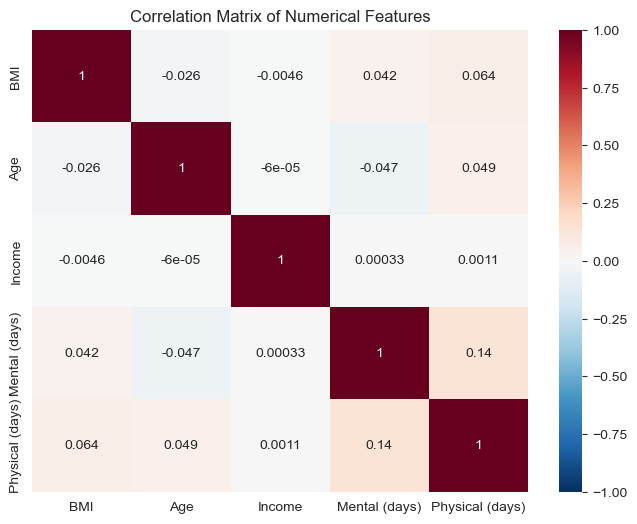

In [99]:
# 4.1 correlation Matrix
numerical_features = ['BMI', 'Age', 'Income', 'Mental (days)', 'Physical (days)']

corr = df[numerical_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="RdBu_r", center=0, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


/var/folders/lz/nxbcp7ys14g35v6dkcczhfh00000gn/T/ipykernel_60994/711785937.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes', y=col, data=df, ax=axes[1], palette='Blues')


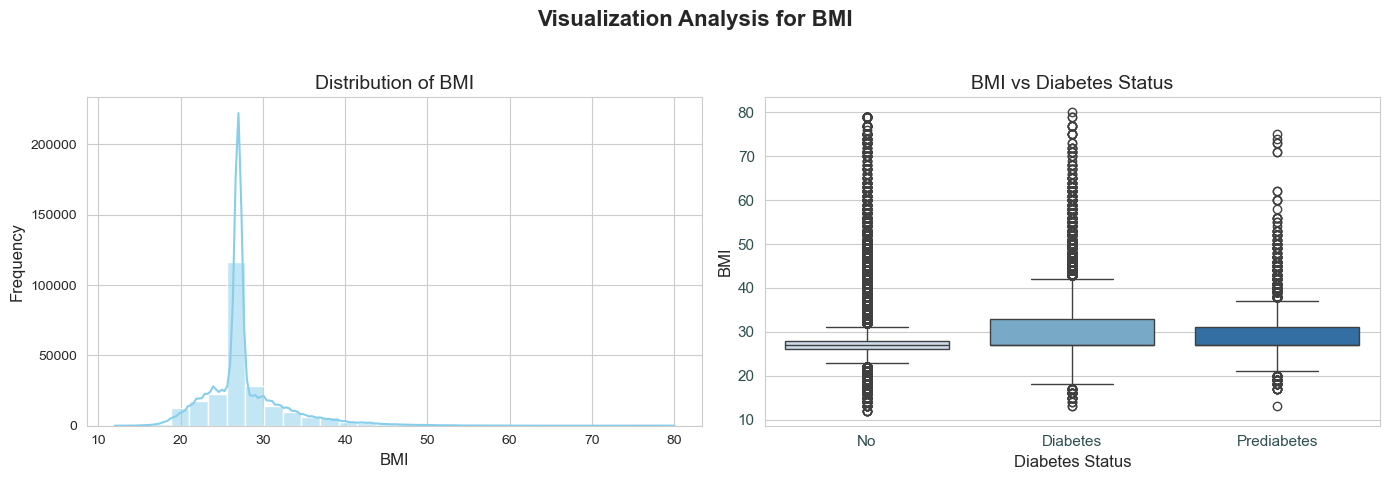

/var/folders/lz/nxbcp7ys14g35v6dkcczhfh00000gn/T/ipykernel_60994/711785937.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes', y=col, data=df, ax=axes[1], palette='Blues')


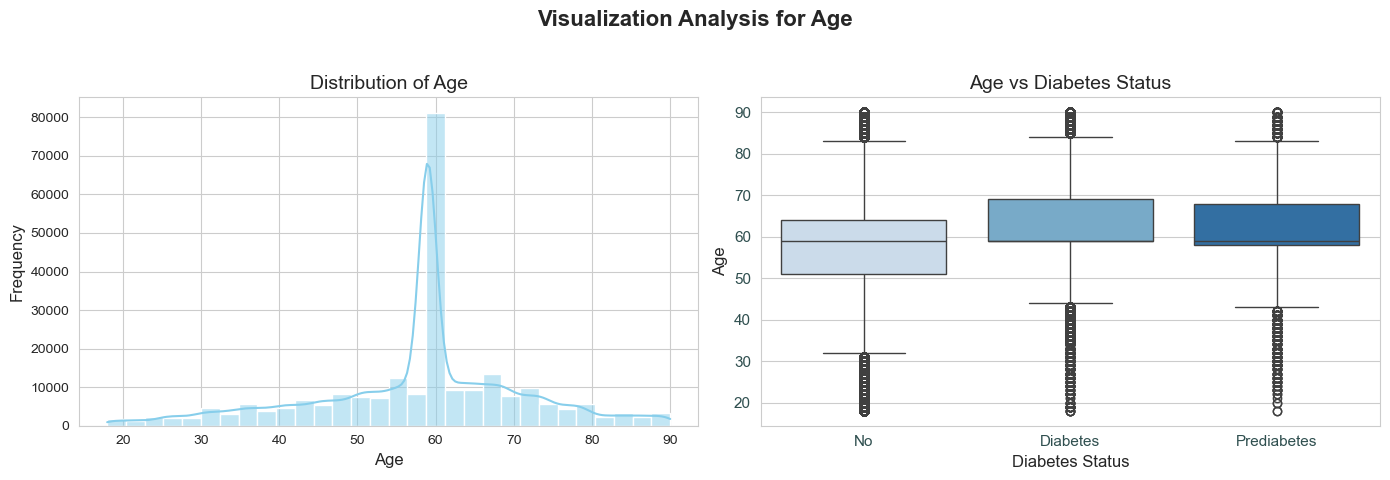

/var/folders/lz/nxbcp7ys14g35v6dkcczhfh00000gn/T/ipykernel_60994/711785937.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes', y=col, data=df, ax=axes[1], palette='Blues')


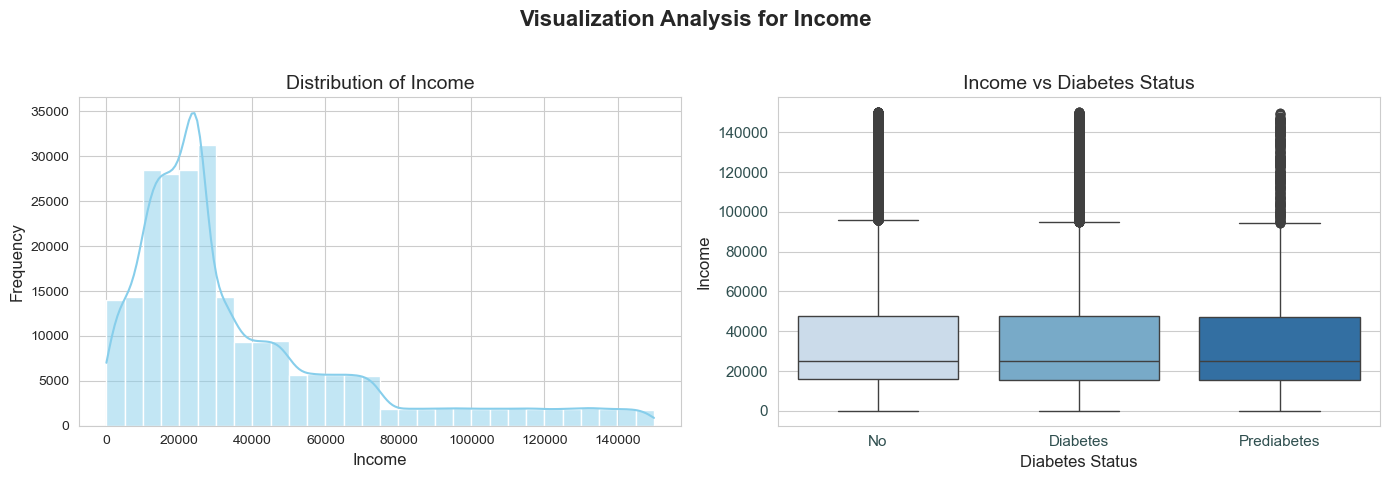

/var/folders/lz/nxbcp7ys14g35v6dkcczhfh00000gn/T/ipykernel_60994/711785937.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes', y=col, data=df, ax=axes[1], palette='Blues')


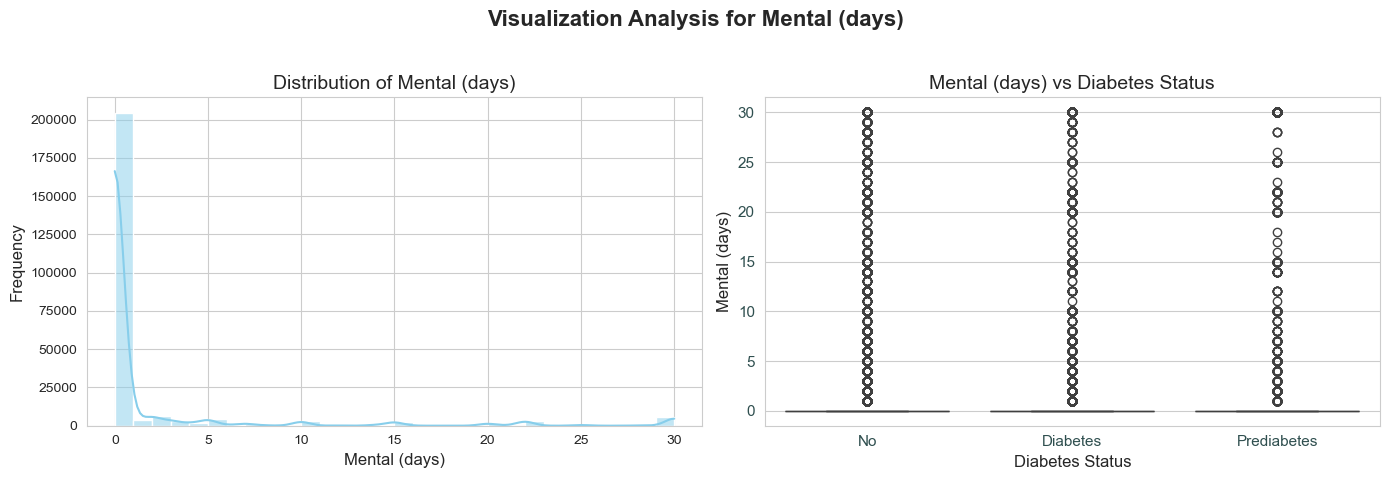

/var/folders/lz/nxbcp7ys14g35v6dkcczhfh00000gn/T/ipykernel_60994/711785937.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes', y=col, data=df, ax=axes[1], palette='Blues')


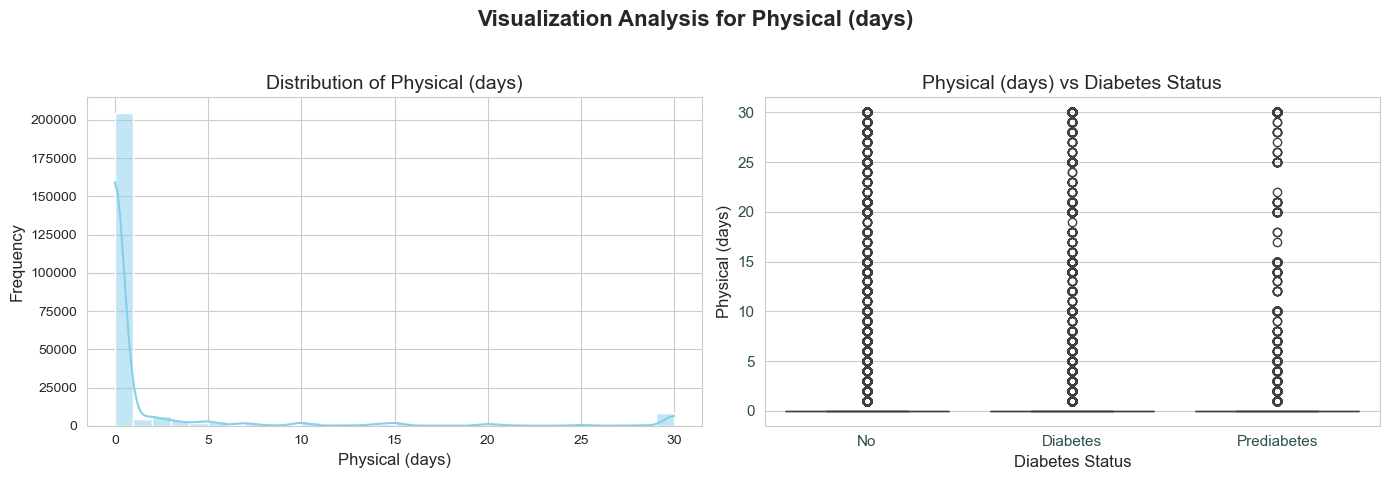

In [113]:
# 4.2 Distributions and Box Plots for Numerical Features
sns.set_style("whitegrid")

numerical_features = ['BMI', 'Age', 'Income', 'Mental (days)', 'Physical (days)']

for col in numerical_features:
    # Create a graphic object that contains two side-by-side subgraphs
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # The histogram of the left subgraph
    sns.histplot(df[col], kde=True, bins=30, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)

    # The box plot of the right subgraph
    sns.boxplot(x='Diabetes', y=col, data=df, ax=axes[1], palette='Blues')
    axes[1].set_xlabel('Diabetes Status', fontsize=12)
    axes[1].set_ylabel(col, fontsize=12)
    axes[1].tick_params(axis='x', labelsize=11, labelcolor='darkslategray')
    axes[1].tick_params(axis='y', labelsize=11, labelcolor='darkslategray')
    axes[1].set_title(f'{col} vs Diabetes Status', fontsize=14)

    fig.suptitle(f'Visualization Analysis for {col}', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    plt.show()

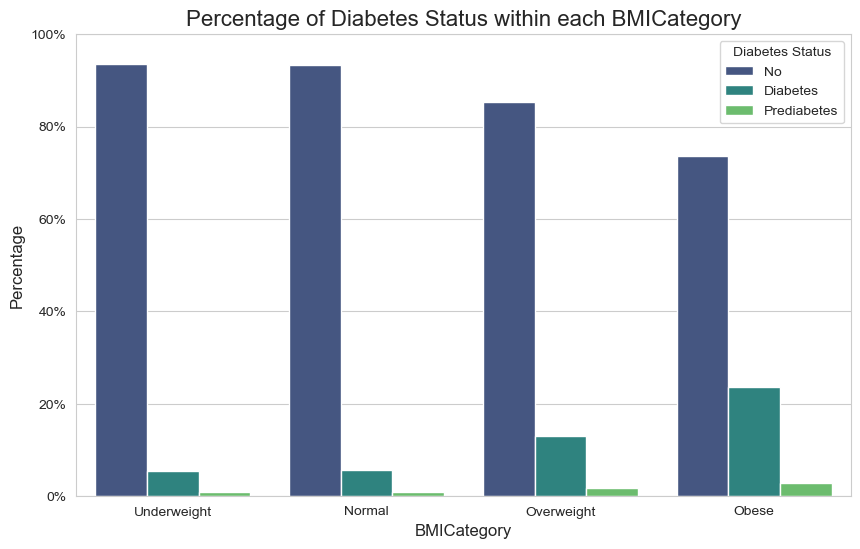

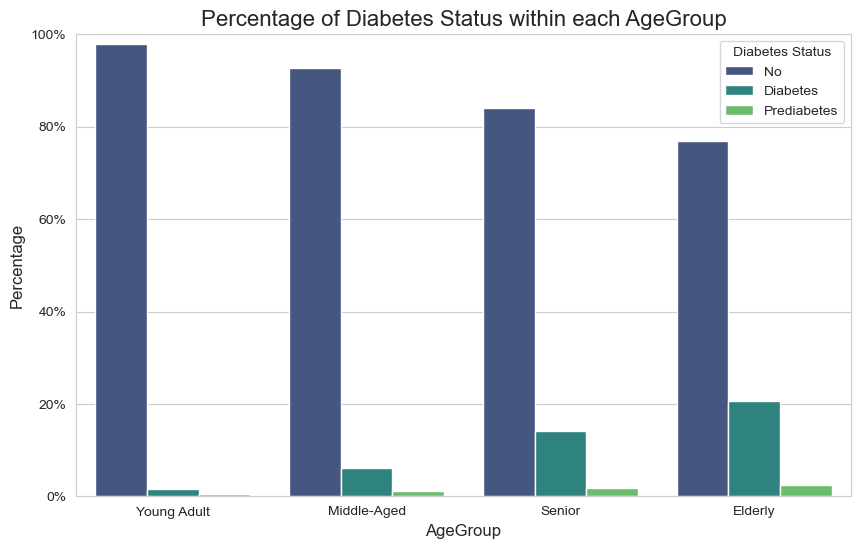

In [112]:
# 4.3 Percentage of diabetes within bmi and age category
from matplotlib.ticker import PercentFormatter

for feature in new_features:
    # Calculate the percentage within each feature category
    prop_df = df.groupby(feature, observed=False)['Diabetes'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

    # Draw a percentage bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='percent', hue='Diabetes', data=prop_df, palette='viridis')
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    
    plt.title(f'Percentage of Diabetes Status within each {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.legend(title='Diabetes Status')
    plt.ylim(0, 100)
    plt.show()


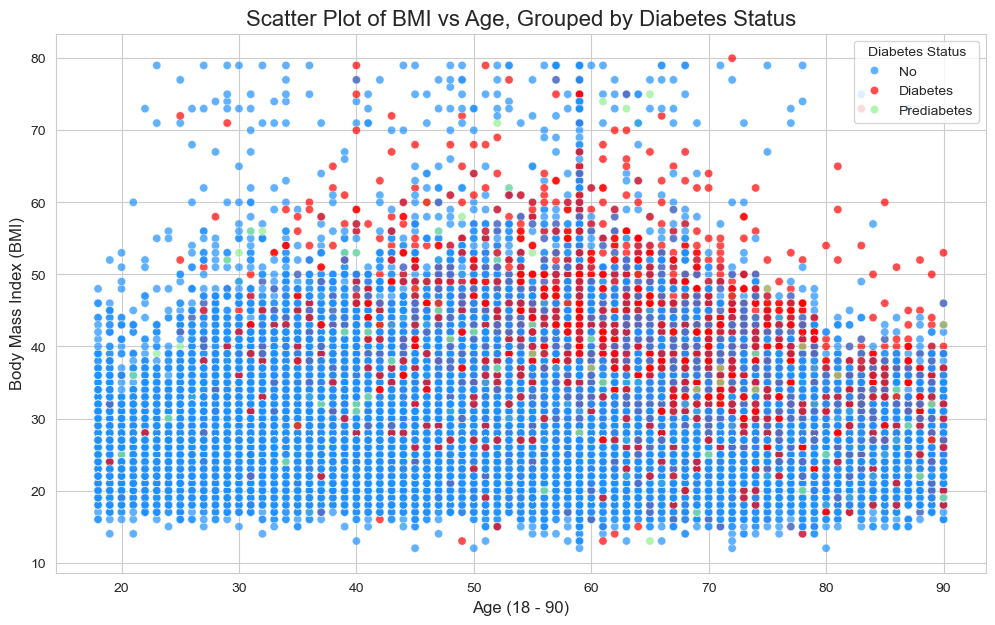

In [116]:
# 4.4 Scatter Plot of BMI vs. Age by Diabetes Status
plt.figure(figsize=(12, 7))

# Define colors
palette_colors = {
    'No': 'dodgerblue',
    'Diabetes': 'red',
    'Prediabetes': 'lightgreen'
}

# Create a scatterplot 
sns.scatterplot(data=df,
                x='Age',
                y='BMI',
                hue='Diabetes',
                palette=palette_colors,
                alpha=0.7) 

plt.title('Scatter Plot of BMI vs Age, Grouped by Diabetes Status', fontsize=16)
plt.xlabel('Age (18 - 90)', fontsize=12)
plt.ylabel('Body Mass Index (BMI)', fontsize=12)
plt.legend(title='Diabetes Status')
plt.grid(True)

plt.show()